https://ics.uci.edu/~ssirani/pubs/apgv06.pdf

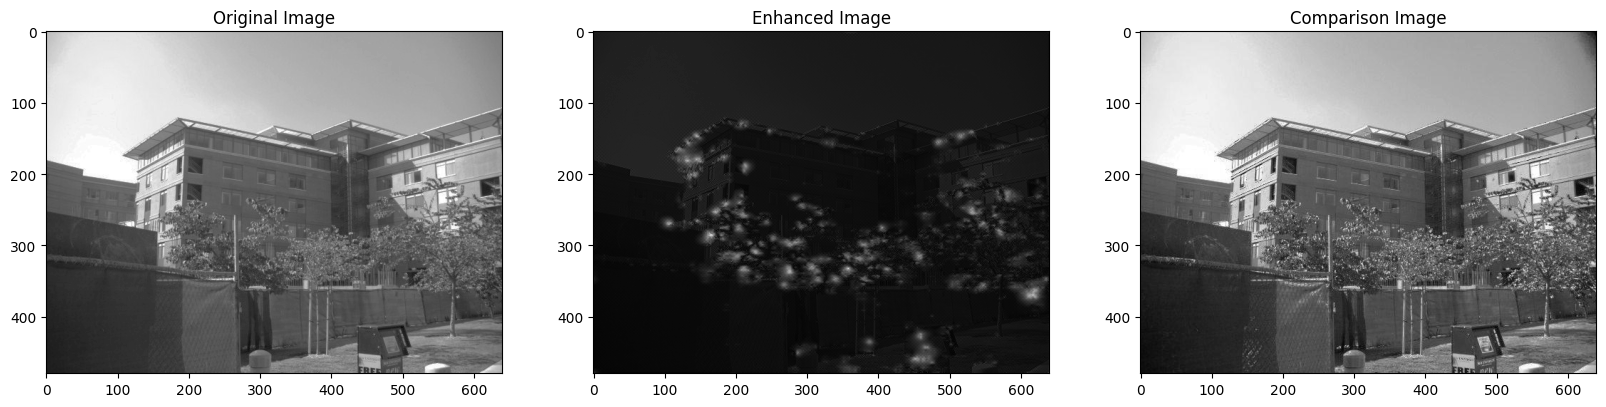

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image_path = "example_input.jpg"
comparison_image_path = "example_output.jpg"

# Step 1: Read the image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
comparison_image = cv2.imread(comparison_image_path, cv2.IMREAD_GRAYSCALE)
original_image = image.copy()

# Step 2: Convert to frequency domain using Fourier Transform
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Step 3: Apply the Human Contrast Sensitivity Function (CSF)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Define the frequency grid
u = np.arange(-crow, crow)
v = np.arange(-ccol, ccol)
U, V = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

# Define the CSF (example parameters, actual parameters need to be derived from the paper)
def csf(D):
    return 0.5 * (1.0 / (1.0 + 0.01 * D**2))

H = csf(D)

# Apply the CSF to the DFT of the image
H = np.fft.ifftshift(H)
dft_shift[:, :, 0] *= H
dft_shift[:, :, 1] *= H

# Step 4: Inverse Fourier Transform to get back to spatial domain
dft_ishift = np.fft.ifftshift(dft_shift)
image_back = cv2.idft(dft_ishift)
image_back = cv2.magnitude(image_back[:, :, 0], image_back[:, :, 1])

# Step 5: Normalize the result
image_back = cv2.normalize(image_back, None, 0, 255, cv2.NORM_MINMAX)
image_back = np.uint8(image_back)

# Display the original and enhanced images
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(image_back, cmap='gray'), plt.title('Enhanced Image')
plt.subplot(1, 3, 3), plt.imshow(comparison_image, cmap='gray'), plt.title('Comparison Image')
plt.show()